In [10]:
import os
import sys

sys.path.append('/root/diffuser_chain_hd')
# print(os.path.dirname(os.path.dirname(os.path.abspath(__file__))))
# exit()


import json
import numpy as np
from os.path import join
import pdb

from diffuser.guides.policies import Policy
import diffuser.datasets as datasets
import diffuser.utils as utils

import argparse


class Parser(utils.Parser):
    dataset: str = 'maze2d-large-v1'
    config: str = 'config.maze2d_390_actionWeight1'


#---------------------------------- setup ----------------------------------#
n_samples = 100

args = Parser().parse_args('diffusion', add_extras=False) # Discovered it later, so had to disable it as I am doing it here, until I test it


[ utils/setup ] Reading config: config.maze2d_390_actionWeight1:maze2d_large_v1
[ utils/setup ] Using overrides | config: config.maze2d_390_actionWeight1 | dataset: maze2d_large_v1
[ utils/setup ] Setting exp_name to: diffuserdiffuserdiffusion_actW1/H384_T256_J1


In [11]:
env = datasets.load_environment(args.dataset)

args.dataset

'maze2d-large-v1'

In [12]:
dataset_config = utils.Config(
    args.loader,
    savepath=(args.savepath, "dataset_config.pkl"),
    env=args.dataset,
    horizon=args.horizon,
    normalizer=args.normalizer,
    preprocess_fns=args.preprocess_fns,
    use_padding=args.use_padding,
    max_path_length=args.max_path_length,
    jump=args.jump,
    jump_action=args.jump_action,
)


render_config = utils.Config(
    args.renderer,
    savepath=(args.savepath, "render_config.pkl"),
    env=args.dataset,
)

[ utils/config ] Imported diffuser.datasets:GoalDataset

[utils/config ] Config: <class 'diffuser.datasets.sequence.GoalDataset'>
    env: maze2d-large-v1
    horizon: 384
    jump: 1
    jump_action: none
    max_path_length: 300000
    normalizer: LimitsNormalizer
    preprocess_fns: ['maze2d_set_terminals']
    use_padding: False

[ utils/config ] Saved config to: logs/maze2d-large-v1/diffuserdiffuserdiffusion_actW1/H384_T256_J1/dataset_config.pkl

[ utils/config ] Imported diffuser.utils:Maze2dRenderer

[utils/config ] Config: <class 'diffuser.utils.rendering.Maze2dRenderer'>
    env: maze2d-large-v1

[ utils/config ] Saved config to: logs/maze2d-large-v1/diffuserdiffuserdiffusion_actW1/H384_T256_J1/render_config.pkl



In [13]:
args.horizon

384

In [14]:
dataset = dataset_config()
renderer = render_config()



load datafile: 100%|██████████████████████████████| 8/8 [00:01<00:00,  5.46it/s]


[ utils/preprocessing ] Segmented maze2d-large-v1 | 1061 paths | min length: 67 | max length: 30470 | mean length: 3764.9057492931197
[ datasets/buffer ] Finalized replay buffer | 1062 episodes
[ datasets/buffer ] Fields:
    actions: (1062, 300000, 2)
    infos/goal: (1062, 300000, 2)
    infos/qpos: (1062, 300000, 2)
    infos/qvel: (1062, 300000, 2)
    observations: (1062, 300000, 4)
    rewards: (1062, 300000, 1)
    terminals: (1062, 300000, 1)
    timeouts: (1062, 300000, 1)
    next_observations: (1062, 300000, 4)
    normed_observations: (1062, 300000, 4)
    normed_actions: (1062, 300000, 2)


(array([11.,  7.,  1.,  0.,  3.,  2.,  2.,  1.,  0.,  1.]),
 array([  1388.,  14165.,  26942.,  39719.,  52496.,  65273.,  78050.,
         90827., 103604., 116381., 129158.]),
 <BarContainer object of 10 artists>)

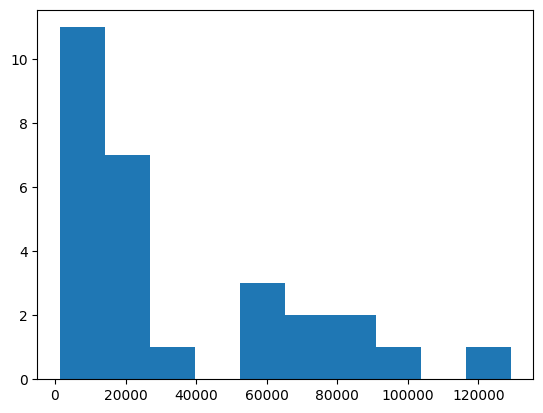

In [7]:
import matplotlib.pyplot as plt
plt.hist(dataset.path_lengths)

In [15]:
env


In [16]:
env._target

(7, 9)

In [21]:
observations = env.reset()
observations, env._target

(array([5.94199236, 7.98661451, 0.05273969, 0.04762307]), (7, 9))

In [18]:
sg = np.concatenate([observations[None], np.array([[*env._target, 0, 0]])], axis=0)
sg.shape

(2, 4)

Saved 1 samples to: /root/diffuser_chain_hd/scripts/sg.png


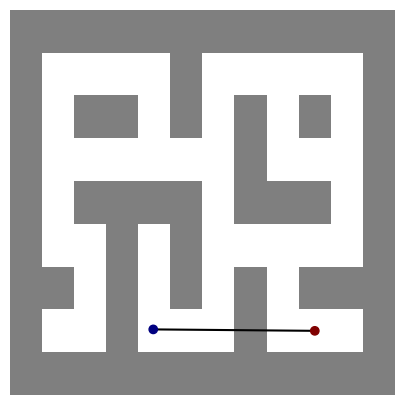

In [19]:
renderer.composite('/root/diffuser_chain_hd/scripts/sg.png', sg[None], ncol=1)